<a href="https://colab.research.google.com/github/NMshoeb666/Neural-Nexus/blob/main/MLfinals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries and Loading the Dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
t_path="/content/drive/MyDrive/Anam_Shoeb_2024UCA1864 /Dataset/tracks.csv"
df=pd.read_csv(t_path)
print('Shape: ',df.shape,'\n')
print('Info:\n')
df.info()
print('\nDescription:\n')
df.describe()

Shape:  (586672, 20) 

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  flo

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [3]:
print(df.head(3))


                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645   0.445    0   -13.338     1       0.4510   
1   1922-06-01         0.695   0.263    0   -22.136     1       0.9570   
2   1922-03-21         0.434   0.177    1   -21.180     1       0.0512   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0

Checking for null values in every column

In [4]:
print(df.isnull().sum())

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64


As only names are missing, we replace them with 'missing'.

In [5]:
print(df.isnull().sum().sum())
df1 = df.fillna('missing')

71


# **EDA**

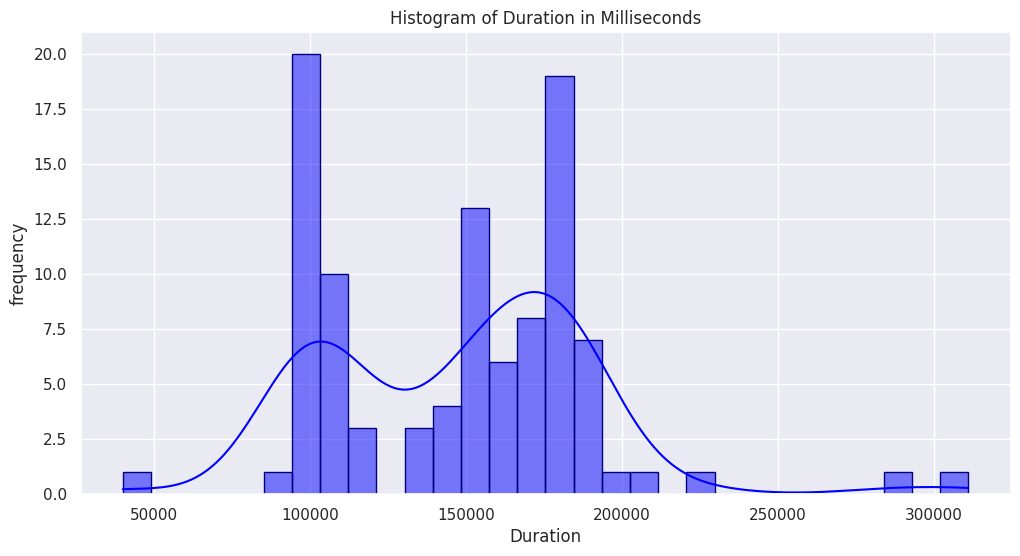

In [27]:
dataset=df['duration_ms'][10:110]
plt.figure(figsize=(12, 6))
sns.histplot(dataset, kde=True, bins=30, color='blue', edgecolor='navy')
plt.title('Histogram of Duration in Milliseconds')
plt.xlabel('Duration')
plt.ylabel('frequency')
plt.show()

<ipython-input-7-045583a36580>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='tempo', data=df[25:40], palette='coolwarm')


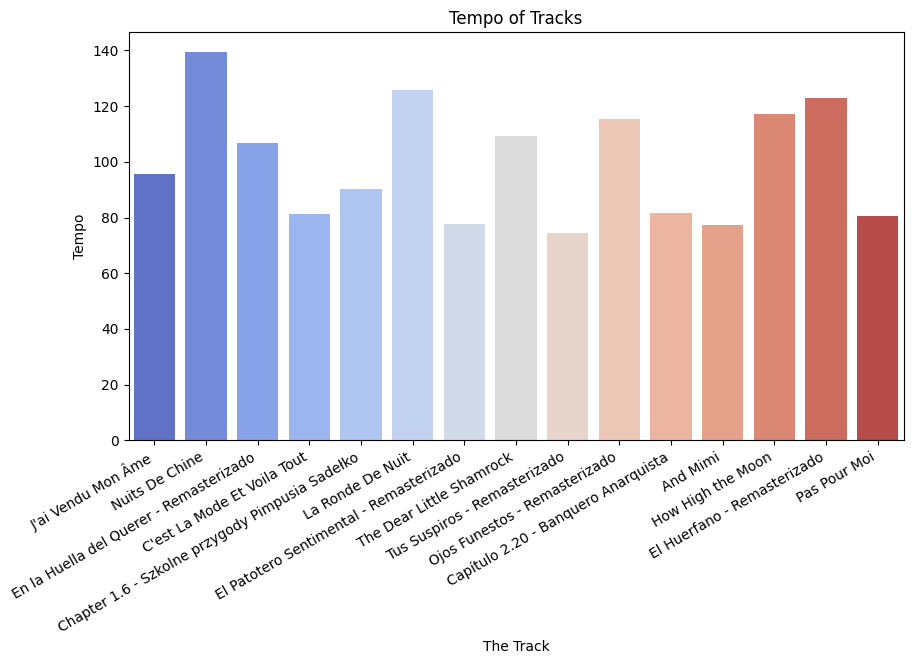

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='tempo', data=df[25:40], palette='coolwarm')
plt.gcf().autofmt_xdate()
plt.title('Tempo of Tracks')
plt.ylabel('Tempo')
plt.xlabel('The Track')
plt.show()

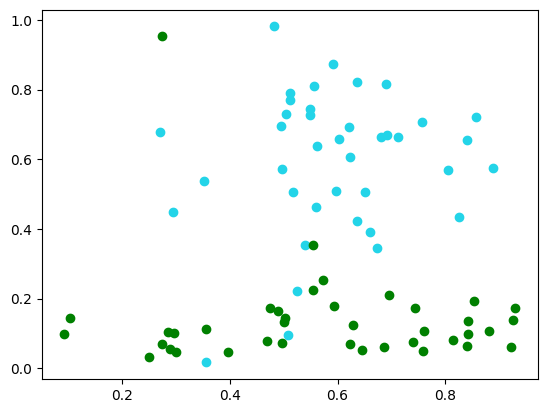

In [8]:
x=df['danceability'][63681:63720]
y=df['energy'][63681:63720]
plt.scatter(x,y, color='#23d4e8')
x=df['valence'][63681:63720]
y=df['liveness'][63681:63720]
plt.scatter(x,y, color='green')
plt.show()

Adding new column 'popularity_category' that categorizes songs into 'Low', 'Medium', or 'High' based on their popularity score.

In [9]:
def popularity_category(popularity):
    if popularity < 20:
        return 'Low'
    elif 20 <= popularity < 50:
        return 'Medium'
    else:
        return 'High'

df1['popularity_category'] = df1['popularity'].apply(popularity_category)
df1.loc[:,['name','popularity','popularity_category']].tail(15)

,name,popularity,popularity_category
586657,The Cutest Puppy,67,High
586658,奉劝,48,Medium
586659,天空之外,49,Medium
586660,Edelweiss,65,High
586661,remember the mornings,67,High
586662,Meet Again,57,High
586663,四季予你 - DJ版,47,Medium
586664,同行 (新加坡電視劇《愛...沒有距離》主題曲),43,Medium
586665,John Brown's Song,66,High
586666,Skyscraper,4,Low


Adding a new column 'energy_level' that categorizes songs as 'low', 'medium', or 'high' based on their energy value.

In [10]:
def energy_level(energy):
    if energy < 0.4:
        return 'low'
    elif 0.4 <= energy < 0.6:
        return 'medium'
    else:
        return 'high'
df1['energy_level']=df1['energy'].apply(energy_level)
df1.loc[10000:,['name','energy','energy_level']].head(10)

,name,energy,energy_level
10000,Evil,0.7030,high
10001,Kamariera,0.5110,medium
10002,Caldonia,0.5720,medium
10003,Cogote,0.2210,low
10004,"Das ist bei uns nicht möglich, Kapitel 152",0.2150,low
10005,"Das ist bei uns nicht möglich, Kapitel 69",0.2650,low
10006,Chicken Rock - Remastered,0.9570,high
10007,"Beethoven: Piano Concerto No. 4 in G Major, Op...",0.2210,low
10008,"Wagner: Die Walküre, WWV 86B, Act 2: ""Siegmund...",0.2410,low
10009,"Haydn: String Quartet No. 6 in C Major, Op. 1 ...",0.0784,low


Selecting specific columns from the dataframe, then normalizing the numerical features to a range between 0 and 1.

In [11]:
df2=df1.drop(columns=['energy_level','id','name','artists','id_artists','release_date','popularity_category'])
df_normalized = (df2 - df2.min()) / (df2.max() - df2.min())
print(df_normalized)

        popularity  duration_ms  explicit  danceability  energy       key  \
0             0.06     0.021994       0.0      0.650858  0.4450  0.000000   
1             0.00     0.016885       0.0      0.701312  0.2630  0.000000   
2             0.00     0.031737       0.0      0.437941  0.1770  0.090909   
3             0.00     0.030895       0.0      0.323915  0.0946  0.636364   
4             0.00     0.028434       0.0      0.405651  0.1580  0.272727   
...            ...          ...       ...           ...     ...       ...   
586667        0.50     0.045377       0.0      0.565086  0.5180  0.000000   
586668        0.72     0.026691       0.0      0.771948  0.6630  0.000000   
586669        0.70     0.032798       0.0      0.539859  0.3140  0.636364   
586670        0.58     0.024682       0.0      0.702321  0.6150  0.909091   
586671        0.38     0.037562       0.0      0.692230  0.7230  0.545455   

        loudness  mode  speechiness  acousticness  instrumentalness  livene

Calculating and displaying the correlation matrix for the numerical features in the dataframe.

In [26]:
corr = df2.corr()
corr

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,0.027681,0.211758,0.187000,0.302315,0.015299,0.327028,-0.033655,-0.047357,-0.370882,-0.236487,-0.048740,0.004643,0.071364,0.086759
duration_ms,0.027681,1.000000,-0.016747,-0.120371,0.024825,0.004626,0.000337,-0.027610,-0.125771,-0.064434,0.069278,0.002137,-0.163202,-0.001210,0.037552
explicit,0.211758,-0.016747,1.000000,0.150229,0.123076,0.010932,0.134603,-0.051754,0.102258,-0.149018,-0.067520,-0.013114,-0.016539,0.005745,0.044447
danceability,0.187000,-0.120371,0.150229,1.000000,0.241563,0.018824,0.251436,-0.044719,0.199310,-0.242951,-0.225900,-0.106168,0.528150,-0.040783,0.146196
energy,0.302315,0.024825,0.123076,0.241563,1.000000,0.036294,0.764735,-0.065246,-0.053506,-0.715412,-0.195839,0.124632,0.372276,0.230099,0.188983
key,0.015299,0.004626,0.010932,0.018824,0.036294,1.000000,0.027109,-0.129491,-0.001035,-0.027414,-0.006776,-0.006774,0.019992,0.004904,0.008928
loudness,0.327028,0.000337,0.134603,0.251436,0.764735,0.027109,1.000000,-0.040464,-0.167112,-0.519423,-0.329306,0.029529,0.275448,0.189288,0.164377
mode,-0.033655,-0.027610,-0.051754,-0.044719,-0.065246,-0.129491,-0.040464,1.000000,-0.017992,0.058918,-0.010008,0.007009,0.011474,0.007871,-0.015892
speechiness,-0.047357,-0.125771,0.102258,0.199310,-0.053506,-0.001035,-0.167112,-0.017992,1.000000,0.069060,-0.102440,0.207047,0.046501,-0.086911,-0.114171
acousticness,-0.370882,-0.064434,-0.149018,-0.242951,-0.715412,-0.027414,-0.519423,0.058918,0.069060,1.000000,0.204412,-0.004738,-0.180939,-0.195235,-0.173927


# Feature engineering

Encoding using label encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoded = LabelEncoder().fit_transform(df1['energy_level'])
label_encoded = LabelEncoder().fit_transform(df1['popularity_category'])
print("Label Encoded Data: \n", label_encoded)
df1['energy_level'] = LabelEncoder().fit_transform(df1['energy_level'])
df1['popularity_category'] = LabelEncoder().fit_transform(df1['popularity_category'])
df1[['name','artists','popularity','popularity_category','energy','energy_level']]



Label Encoded Data: 
 [1 1 1 ... 0 0 2]


,name,artists,popularity,popularity_category,energy,energy_level
0,Carve,['Uli'],6,1,0.4450,2
1,Capítulo 2.16 - Banquero Anarquista,['Fernando Pessoa'],0,1,0.2630,1
2,Vivo para Quererte - Remasterizado,['Ignacio Corsini'],0,1,0.1770,1
3,El Prisionero - Remasterizado,['Ignacio Corsini'],0,1,0.0946,1
4,Lady of the Evening,['Dick Haymes'],0,1,0.1580,1
...,...,...,...,...,...,...
586667,云与海,['阿YueYue'],50,0,0.5180,2
586668,blind,['ROLE MODEL'],72,0,0.6630,0
586669,What They'll Say About Us,['FINNEAS'],70,0,0.3140,1
586670,A Day At A Time,"['Gentle Bones', 'Clara Benin']",58,0,0.6150,0


Performing one-hot encoding on the 'energy_level' column

In [14]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoded = pd.get_dummies(df1['energy_level'])
print(one_hot_encoded)


            0      1      2
0       False  False   True
1       False   True  False
2       False   True  False
3       False   True  False
4       False   True  False
...       ...    ...    ...
586667  False  False   True
586668   True  False  False
586669  False   True  False
586670   True  False  False
586671   True  False  False

[586672 rows x 3 columns]


Train-Test Split

Splitting the dataset into 80% training and 20% testing using train_test_split() from sklearn.model_selection.


In [24]:
from sklearn.model_selection import train_test_split
X = df2
y = df1['popularity_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Features:\n", X_train)
print("Testing Features:\n", X_test)
print("Training Target:\n", y_train)
print("Testing Target:\n", y_test)

Training Features:
         popularity  duration_ms  explicit  danceability  energy  key  \
431626          21       206933         0         0.700   0.385    0   
481382          26       163600         0         0.637   0.839    2   
41728           47       149280         0         0.634   0.586    4   
419851          36       231288         0         0.820   0.814   10   
172826          52       294000         0         0.295   0.961    2   
...            ...          ...       ...           ...     ...  ...   
110268          44       246178         0         0.745   0.451   11   
259178          10       157013         0         0.448   0.727    7   
365838          33       188200         0         0.789   0.198    9   
131932          64       307000         1         0.629   0.578    1   
121958           0       195933         0         0.508   0.033    7   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
431626   -13.987     1       0.031

# Regression


Train a Linear Regression model to predict the target variable.

Evaluate the model using:

1. Mean Squared Error (MSE)

2. Mean Absolute Error (MAE)

3. R² Score



In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss')
}

Calculating and printing several metrics to evaluate the performance of the regression model


In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Squared Error: 0.4732532060466591
Root Mean Squared Error: 0.687934012857817
Mean Absolute Error: 0.6260530027389554
R² Score: 0.040879218307066756


In [25]:
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
results[model_name]={'MSE':mse, 'RMSE':rmse, 'R2':r2}

results_df=pd.DataFrame(results).T
results_df

,MSE,RMSE,R2
Logistic Regression,1.000000,1.000000,1.000000
K-Nearest Neighbors,0.913231,0.913231,0.913231
Decision Tree,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000
XGBoost,0.473253,0.687934,0.040879


 Identifying and selecting the best-performing regression model based on the highest R-squared (R²) score.

In [21]:
best_model_name=results_df["R2"].idxmax()
best_model=models[best_model_name]
best_model_name

'Logistic Regression'

Using a bar graph visualization to compare regression model performance, with bar heights representing R-squared (R²) scores. Higher bars indicate better-performing models.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'K-Nearest Neighbors'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'XGBoost')])

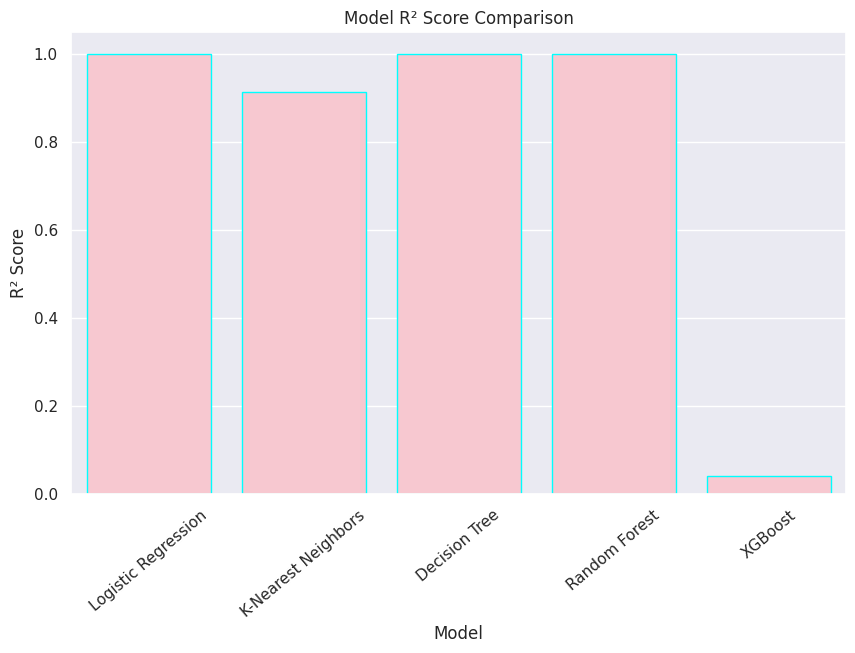

In [23]:
sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2'], color='pink', edgecolor='cyan')
plt.title('Model R² Score Comparison')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=40)